# Explorando

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tester
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest
from feature_format import featureFormat, targetFeatureSplit
import tester
%matplotlib inline

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Vamos abrir a cerregar dodos os dados para a ánalise
# Usando o With open para melhor uso da memória
with open("final_project_dataset.pkl","rb") as data_file:
    my_dataset = pickle.load(data_file)


In [3]:
# Convertando para pandas para melhor manipulação
# from_dict é por o cojunto de dados está em formato de dicionário
# Assim ficará normal
df = pd.DataFrame.from_dict(my_dataset, orient='index')

In [4]:
# Removendo os valores nulos
df = df.replace('NaN',np.nan)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income              49 non-null float

Pode-se observar que que temos 146 individuos e que a grande maioria dos dados são float, apenas a linha "poi" é boolean e os emails são object (Texto), e é possivel observar que após a remoção dos valores nulos, algumas variaveis ficaram com poucas observações, sendo elas observações de ambito financeiro, irei substituir por 0, e as as variaveis de email irei preencher com a média dos valores dos outros

In [6]:
# Para agilidade, vou criar um lista separando os grupos das variaveis númericas
var_financeiro = ['salary','bonus','long_term_incentive','deferred_income',
                 'deferral_payments','loan_advances','other', 
                 'expenses','director_fees','total_payments',
                 'exercised_stock_options','restricted_stock',
                 'restricted_stock_deferred','total_stock_value']

var_email =  ['to_messages','from_messages','from_poi_to_this_person',
              'from_this_person_to_poi','shared_receipt_with_poi']
 
features_list = ['poi'] + var_financeiro + var_email           

In [7]:
# verificando novamento o conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income              49 non-null float

In [8]:
df['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

In [9]:
df['poi'].value_counts(normalize = True)

False    0.876712
True     0.123288
Name: poi, dtype: float64

In [10]:
not_null = df.count()
it_null = df.isna().sum()
poi = df[df['poi'] == True].count()


table_1 = pd.concat([not_null, it_null], axis=1)
table_1 .columns = ['Vars','NaN']
table_1['P_Var_NaN'] = table_1['NaN']/df.shape[0]
table_1.drop(index = 'poi', inplace = True)
table_1

,Vars,NaN,P_Var_NaN
salary,95,51,0.349315
to_messages,86,60,0.410959
deferral_payments,39,107,0.732877
total_payments,125,21,0.143836
exercised_stock_options,102,44,0.301370
bonus,82,64,0.438356
restricted_stock,110,36,0.246575
shared_receipt_with_poi,86,60,0.410959
restricted_stock_deferred,18,128,0.876712
total_stock_value,126,20,0.136986


In [11]:
table_1.shape[0]

20

Apenas a variavel "email_address" está faltanto dados, mas como se trata de emails, são dados que realmente não ha possibilidade de preencher

In [12]:
# Explorando a vaviravel total_payments
df['total_payments'].describe() , df['salary'].describe()

(count    1.250000e+02
 mean     5.081526e+06
 std      2.906172e+07
 min      1.480000e+02
 25%      3.944750e+05
 50%      1.101393e+06
 75%      2.093263e+06
 max      3.098866e+08
 Name: total_payments, dtype: float64, count    9.500000e+01
 mean     5.621943e+05
 std      2.716369e+06
 min      4.770000e+02
 25%      2.118160e+05
 50%      2.599960e+05
 75%      3.121170e+05
 max      2.670423e+07
 Name: salary, dtype: float64)

Avalinando a variável "total_payments" ou total pago, é novavél uma grande discrepancia do valor minimo pelo valor maximo,e 75% dos dados, ou seja aprox 110 dos 146 receberam na faixa de 2 dezenas a menos que os 36 restantes, isso pode ser um outline, é preciso verificar

Text(0,0.5,'total_payments')

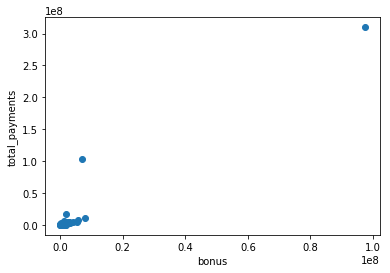

In [13]:
plt.scatter(df['bonus'],df['total_payments'])
plt.xlabel('bonus')
plt.ylabel('total_payments')

Text(0,0.5,'salary')

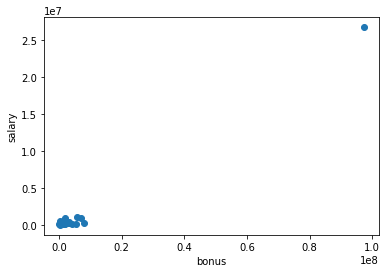

In [14]:
plt.scatter(df['bonus'],df['salary'])
plt.xlabel('bonus')
plt.ylabel('salary')

plotantdo algumas variáveis, é notavel que no cojunto de dados tem algum outline

In [15]:
df[df['salary']==df['salary'].max()]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
TOTAL,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,...,83925000.0,NaN,42667589.0,NaN,False,1398517.0,-27992891.0,48521928.0,NaN,NaN


aparentemente existe um somatório no total nas observações, como "TOTAL" nao pode ser considerado um POI, vamos retirar o mesmo

In [16]:
# Excluindo a observação "TOTAL"
df = df.drop(['TOTAL'],axis = 0)

In [17]:
# Verificando se o mesmo foi excluido
df[df['salary']==df['salary'].max()]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
SKILLING JEFFREY K,1111258.0,3627.0,NaN,8682716.0,19250000.0,5600000.0,6843672.0,2042.0,NaN,26093672.0,...,NaN,108.0,22122.0,30.0,True,NaN,NaN,1920000.0,jeff.skilling@enron.com,88.0


Agora so temos pessoas no cojunto de dados, vamos checar novamente como está a dospersão dos dados

Text(0,0.5,'total_payments')

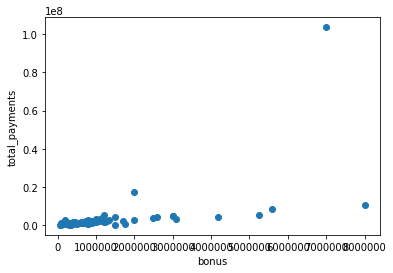

In [18]:
plt.scatter(df['bonus'],df['total_payments'])
plt.xlabel('bonus')
plt.ylabel('total_payments')

Text(0,0.5,'total_payments')

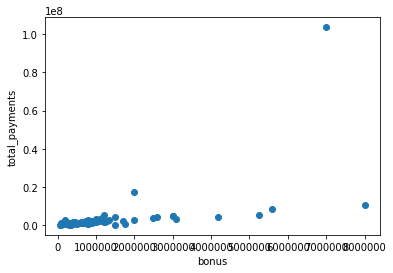

In [19]:
plt.scatter(df['bonus'],df['total_payments'],)
plt.xlabel('bonus')
plt.ylabel('total_payments')


Ainda temos algums pontos extremos, vamos verificar se essas pessoas são POIS

In [20]:
df.nlargest(5,'salary')[df['poi']==False]

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,NaN,14622185.0,...,2000000.0,21.0,7427621.0,6.0,False,NaN,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
PICKERING MARK R,655037.0,898.0,NaN,1386690.0,28798.0,300000.0,NaN,728.0,NaN,28798.0,...,400000.0,67.0,NaN,0.0,False,NaN,NaN,NaN,mark.pickering@enron.com,7.0
WHALLEY LAWRENCE G,510364.0,6019.0,NaN,4677574.0,3282960.0,3000000.0,2796177.0,3920.0,NaN,6079137.0,...,NaN,556.0,301026.0,24.0,False,NaN,NaN,808346.0,greg.whalley@enron.com,186.0


In [21]:
df.nlargest(5,'total_payments')[df['poi']==False]

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,10433518.0,2000000.0,4188667.0,2979.0,NaN,14622185.0,...,2000000.0,21.0,7427621.0,6.0,False,NaN,-3367011.0,1617011.0,mark.frevert@enron.com,242.0
BHATNAGAR SANJAY,NaN,523.0,NaN,15456290.0,2604490.0,NaN,-2604490.0,463.0,15456290.0,NaN,...,NaN,29.0,137864.0,1.0,False,137864.0,NaN,NaN,sanjay.bhatnagar@enron.com,0.0
LAVORATO JOHN J,339288.0,7259.0,NaN,10425757.0,4158995.0,8000000.0,1008149.0,3962.0,NaN,5167144.0,...,NaN,2585.0,1552.0,411.0,False,NaN,NaN,2035380.0,john.lavorato@enron.com,528.0


Aparentemnte o FREVERT MARK A, LAVORATO JOHN J, WHALLEY LAWRENCE G aparentam ser um outlines porem eles estão classificados como não POI, pode ser que eles sejam de cargo executivo com alto salário, é interessante em retirar essas pessoas.

BHATNAGAR SANJAY parece que foi inserido errado, não faz sentido alguem com salário zerado está entre os 3 que mais receberam e ainda não ser um POI

In [22]:
# removendo as pessoas

df  = df.drop(['FREVERT MARK A','LAVORATO JOHN J',
               'WHALLEY LAWRENCE G','BHATNAGAR SANJAY'],axis =0)

In [23]:
df['poi'].value_counts()

False    123
True      18
Name: poi, dtype: int64

In [24]:
df['poi'].value_counts(normalize = True)

False    0.87234
True     0.12766
Name: poi, dtype: float64

Após a limpeza de dados, temos 18 POI correspondendo a 12.8% dos individos 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       91 non-null float64
to_messages                  82 non-null float64
deferral_payments            37 non-null float64
total_payments               120 non-null float64
exercised_stock_options      97 non-null float64
bonus                        78 non-null float64
restricted_stock             105 non-null float64
shared_receipt_with_poi      82 non-null float64
restricted_stock_deferred    16 non-null float64
total_stock_value            122 non-null float64
expenses                     91 non-null float64
loan_advances                2 non-null float64
from_messages                82 non-null float64
other                        88 non-null float64
from_this_person_to_poi      82 non-null float64
poi                          141 non-null bool
director_fees                15 non-null float64
deferred_income              47 non-null float6

In [26]:
new_features =[]
df['p_bonus'] = df['bonus']/df['total_payments']
df['p_salary'] = df['salary']/df['total_payments']
new_features.append('p_bonus')
new_features.append('p_salary')

In [27]:
df['p_to_poi'] = df['from_poi_to_this_person'] / df['to_messages']
df['p_shared_poi'] = df['shared_receipt_with_poi'] / df['to_messages']
new_features.append('p_to_poi')
new_features.append('p_shared_poi')

In [28]:
df = df.replace('NaN',np.nan)
df = df.fillna(0.0)

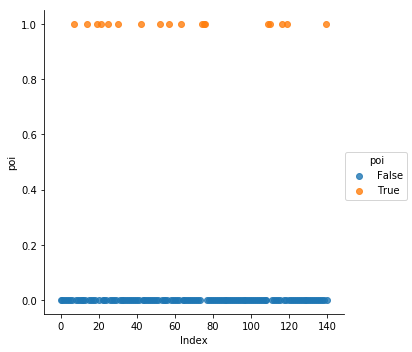

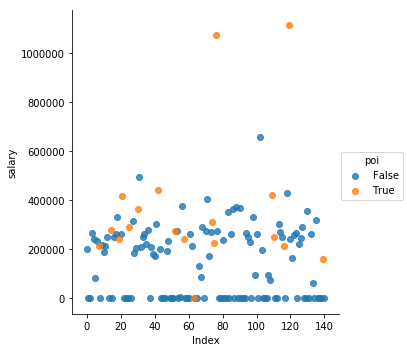

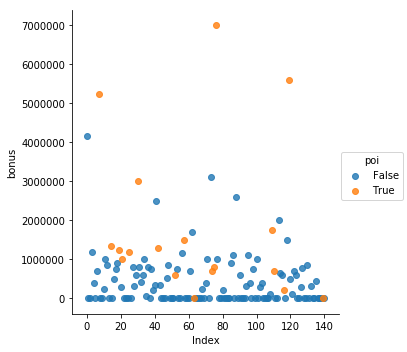

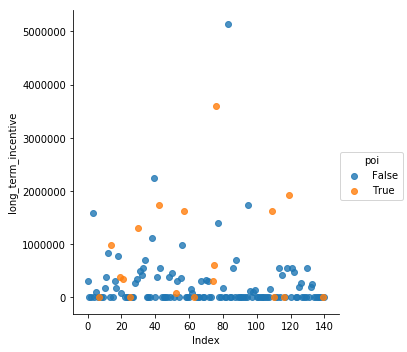

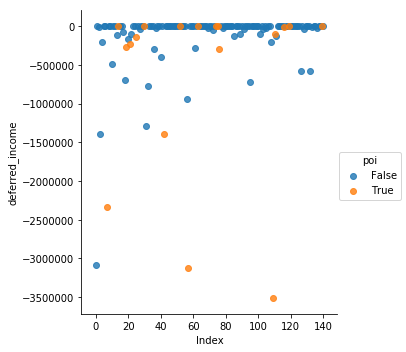

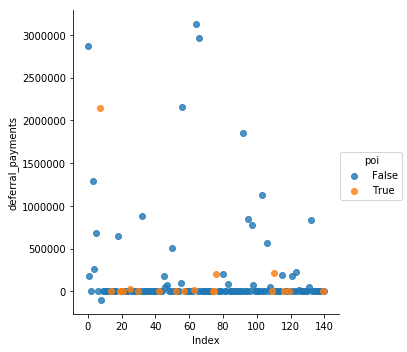

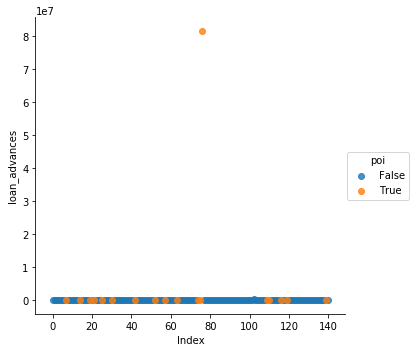

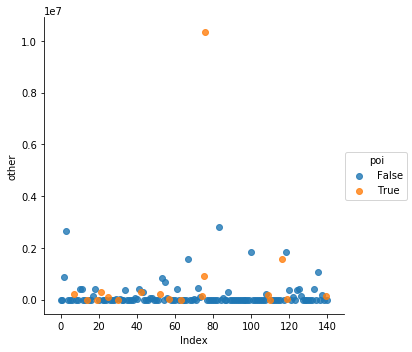

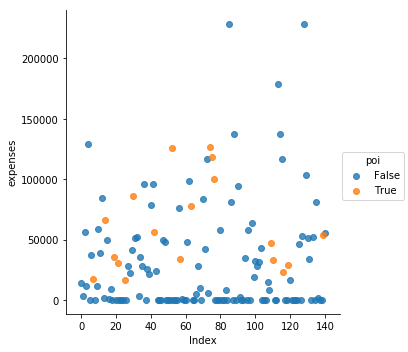

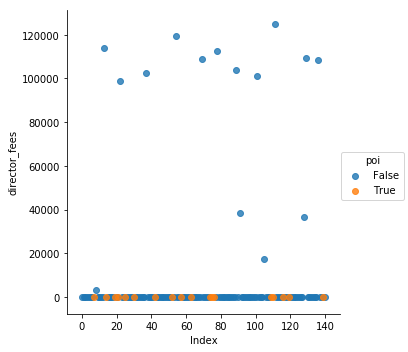

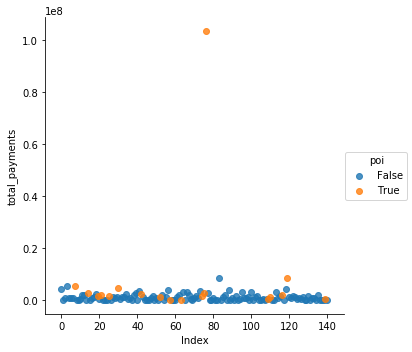

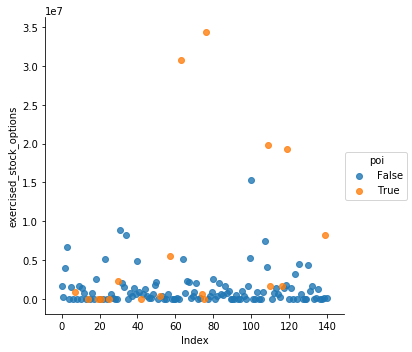

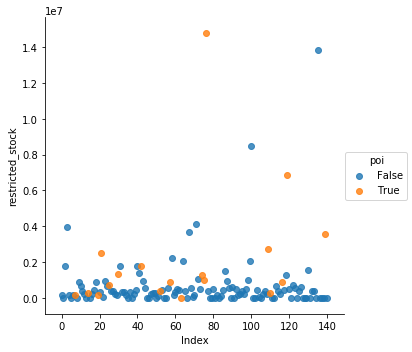

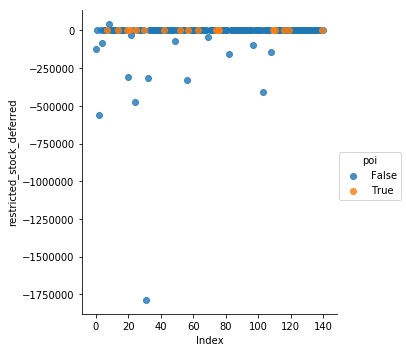

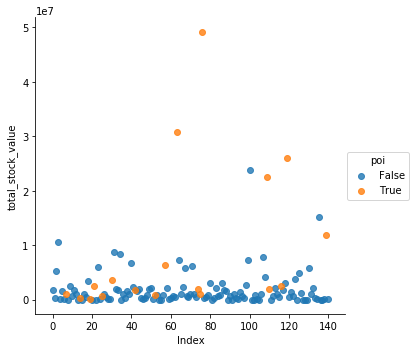

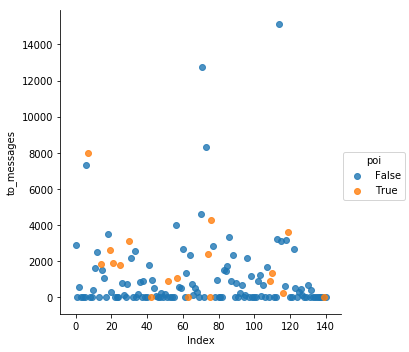

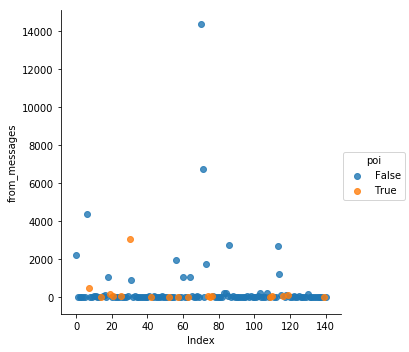

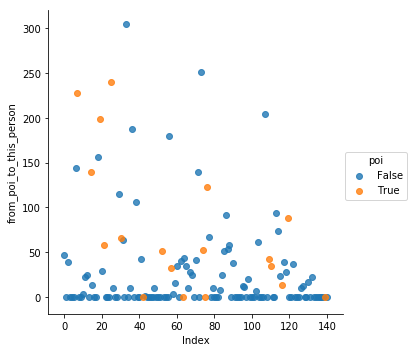

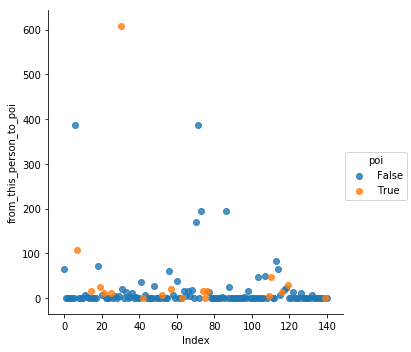

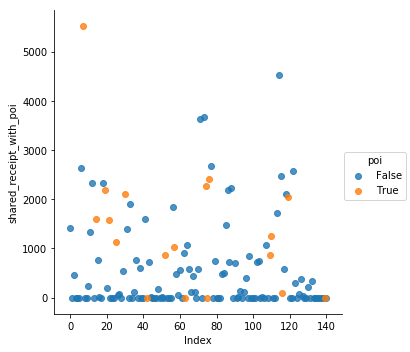

In [29]:
df['name'] = df.index
df = df.reset_index()
df['index'] = df.index
for feature in features_list:
    sns.lmplot('index', feature, 
           data=df, 
           fit_reg=False, 
           hue="poi",  
           size =5 )
    plt.xlabel('Index');
    plt.ylabel(feature);
    

In [30]:
my_dataset = df.T.to_dict()

# SVM com todas a Features

In [409]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [405]:
from sklearn import svm
svm = Pipeline([('scaler',StandardScaler()),('selector',SelectKBest()),('svm',svm.SVC())])
param_grid = ([{'svm__C': [1,50,100,1000],
                'svm__gamma': [0.5, 0.1],
                'svm__degree':[1,2],
                'svm__kernel': ['rbf','poly'],
                'selector__k':range(1,len(features_list))}])

svm_clf = GridSearchCV(svm, param_grid, scoring='recall', cv = 5).fit(features, labels).best_estimator_

tester.test_classifier(svm_clf, my_dataset, features_list)




C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=18, score_func=<function f_classif at 0x000000000C331828>)), ('svm', SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.83957	Precision: 0.40509	Recall: 0.26250	F1: 0.31857	F2: 0.28238
	Total predictions: 14000	True positives:  525	False positives:  771	False negatives: 1475	True negatives: 11229



In [375]:
best_features = []
for i, feature in enumerate(svm_clf.get_params()['selector'].scores_):
        best_features.append([features_list[1:][i],feature])
pd_feature= pd.DataFrame(best_features,index = np.arange(1,len(best_features)+1),columns  = ['Feature','Score'])

best_features = ['poi'] + pd_feature.nlargest(18,'Score')['Feature'].tolist()
pd_feature.nlargest(18,'Score')

,Feature,Score
2,bonus,38.898768
1,salary,25.596746
11,exercised_stock_options,25.349842
14,total_stock_value,24.103581
3,long_term_incentive,21.175191
4,deferred_income,16.713754
17,from_poi_to_this_person,14.166948
19,shared_receipt_with_poi,14.136210
10,total_payments,10.286364
12,restricted_stock,8.246575


#  SVM com as features e paramentros selecionados pelo GridSearchCV

In [376]:
data = featureFormat(my_dataset, best_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [377]:
from sklearn import svm
svm = Pipeline([('scaler',StandardScaler()), ('svm',svm.SVC())])

param_grid = ([{'svm__C': [50],
                'svm__gamma': [0.1],
                'svm__degree':[2],
                'svm__kernel': ['poly']}])

svm_clf = GridSearchCV(svm, param_grid, scoring='recall', cv = 10).fit(features, labels).best_estimator_

tester.test_classifier(svm_clf, my_dataset,best_features)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.84071	Precision: 0.41127	Recall: 0.26650	F1: 0.32342	F2: 0.28668
	Total predictions: 14000	True positives:  533	False positives:  763	False negatives: 1467	True negatives: 11237



# SVM com as novas Features

In [410]:
total_features = []
total_features += features_list + new_features

data = featureFormat(my_dataset,total_features, sort_keys = True)
labels, features = targetFeatureSplit(data)


In [411]:
from sklearn import svm
svm = Pipeline([('scaler',StandardScaler()),('selector',SelectKBest()),('svm',svm.SVC())])
param_grid = ([{'svm__C': [1,50,100,1000],
                'svm__gamma': [0.5, 0.1],
                'svm__degree':[1,2],
                'svm__kernel': ['rbf','poly'],
                'selector__k':range(1,len(total_features))}])

svm_clf = GridSearchCV(svm, param_grid, scoring='recall', cv = 5).fit(features, labels).best_estimator_

tester.test_classifier(svm_clf, my_dataset, total_features)

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=13, score_func=<function f_classif at 0x000000000C331828>)), ('svm', SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.81300	Precision: 0.34219	Recall: 0.33500	F1: 0.33855	F2: 0.33641
	Total predictions: 14000	True positives:  670	False positives: 1288	False negatives: 1330	True negatives: 10712



In [412]:
best_features = []
for i, feature in enumerate(svm_clf.get_params()['selector'].scores_):
        best_features.append([total_features[1:][i],feature])
pd_feature= pd.DataFrame(best_features,index = np.arange(1,len(best_features)+1),columns  = ['Feature','Score'])

best_features = ['poi'] + pd_feature.nlargest(13,'Score')['Feature'].tolist()
pd_feature.nlargest(13,'Score')

,Feature,Score
2,bonus,38.898768
1,salary,25.596746
11,exercised_stock_options,25.349842
14,total_stock_value,24.103581
20,p_bonus,23.829780
3,long_term_incentive,21.175191
4,deferred_income,16.713754
17,from_poi_to_this_person,14.166948
19,shared_receipt_with_poi,14.136210
23,p_shared_poi,10.745080


# SVM com as novas features e paramentros selecionados pelo GridSearchCV

In [413]:
data = featureFormat(my_dataset, best_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [414]:
from sklearn import svm
svm = Pipeline([('scaler',StandardScaler()), ('svm',svm.SVC())])

param_grid = ([{'svm__C': [1000],
                'svm__gamma': [0.1],
                'svm__degree':[2],
                'svm__kernel': ['poly']}])

svm_clf = GridSearchCV(svm, param_grid, scoring='recall',cv = 5).fit(features, labels).best_estimator_

tester.test_classifier(svm_clf, my_dataset,best_features)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.82886	Precision: 0.39919	Recall: 0.39200	F1: 0.39556	F2: 0.39342
	Total predictions: 14000	True positives:  784	False positives: 1180	False negatives: 1216	True negatives: 10820



In [415]:
best_features

['poi',
 'bonus',
 'salary',
 'exercised_stock_options',
 'total_stock_value',
 'p_bonus',
 'long_term_incentive',
 'deferred_income',
 'from_poi_to_this_person',
 'shared_receipt_with_poi',
 'p_shared_poi',
 'total_payments',
 'restricted_stock',
 'other']

# Random Forest com todas as features

In [384]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [385]:
rfm = Pipeline([('scaler',StandardScaler()),('selector',SelectKBest()),('rf',RandomForestClassifier())])
param_grid = ([{'rf__n_estimators': [3,4,5],
                'selector__k':range(1,len(features_list))}])
rf_clf = GridSearchCV(rfm, param_grid, scoring='recall',cv = 5).fit(features, labels).best_estimator_

tester.test_classifier(rf_clf, my_dataset, features_list)

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=12, score_func=<function f_classif at 0x000000000C331828>)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
	Accuracy: 0.83514	Precision: 0.39231	Recall: 0.28050	F1: 0.32711	F2: 0.29745
	Total predictions: 14000	True positives:  561	False positives:  869	False negatives: 1439	True negatives: 11131



In [386]:
best_features = []
for i, feature in enumerate(rf_clf.get_params()['selector'].scores_):
        best_features.append([total_features[1:][i],feature])
pd_feature= pd.DataFrame(best_features,index = np.arange(1,len(best_features)+1),columns  = ['Feature','Score'])

best_features = ['poi'] + pd_feature.nlargest(11,'Score')['Feature'].tolist()
pd_feature.nlargest(11,'Score')

,Feature,Score
2,bonus,38.898768
1,salary,25.596746
11,exercised_stock_options,25.349842
14,total_stock_value,24.103581
3,long_term_incentive,21.175191
4,deferred_income,16.713754
17,from_poi_to_this_person,14.166948
19,shared_receipt_with_poi,14.136210
10,total_payments,10.286364
12,restricted_stock,8.246575


# Random Forest com as features e paramentros selecionados pelo GridSearchCV

In [387]:
data = featureFormat(my_dataset, best_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [389]:
rfm = Pipeline([('scaler',StandardScaler()),('rf',RandomForestClassifier())])
param_grid = ([{'rf__n_estimators': [3]}])
rf_clf = GridSearchCV(rfm, param_grid, scoring='recall',cv = 5).fit(features, labels).best_estimator_

tester.test_classifier(rf_clf, my_dataset, best_features)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
      ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
	Accuracy: 0.83650	Precision: 0.39552	Recall: 0.27350	F1: 0.32338	F2: 0.29148
	Total predictions: 14000	True positives:  547	False positives:  836	False negatives: 1453	True negatives: 11164




# RandomForest usando novas features

In [397]:
total_features = []
total_features += features_list + new_features

data = featureFormat(my_dataset,total_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [398]:
rfm = Pipeline([('scaler',StandardScaler()),('selector',SelectKBest()),('rf',RandomForestClassifier())])
param_grid = ([{'rf__n_estimators': [3,4,5],
                'selector__k':range(1,len(features_list))}])
rf_clf = GridSearchCV(rfm, param_grid, scoring='recall', cv = 5).fit(features, labels).best_estimator_

tester.test_classifier(rf_clf, my_dataset, total_features)

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are constant.
  UserWarning)
C:\Users\Daniel Vieira\Anaconda3\envs\py2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [5] are const

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selector', SelectKBest(k=5, score_func=<function f_classif at 0x000000000C331828>)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
	Accuracy: 0.83479	Precision: 0.38971	Recall: 0.27650	F1: 0.32349	F2: 0.29356
	Total predictions: 14000	True positives:  553	False positives:  866	False negatives: 1447	True negatives: 11134



In [399]:
best_features = []
for i, feature in enumerate(rf_clf.get_params()['selector'].scores_):
        best_features.append([total_features[1:][i],feature])
pd_feature= pd.DataFrame(best_features,index = np.arange(1,len(best_features)+1),columns  = ['Feature','Score'])

best_features = ['poi'] + pd_feature.nlargest(5,'Score')['Feature'].tolist()
pd_feature.nlargest(5,'Score')

,Feature,Score
2,bonus,38.898768
1,salary,25.596746
11,exercised_stock_options,25.349842
14,total_stock_value,24.103581
20,p_bonus,23.829780


# Testando com as Features e paramentros selecionados pelo GridSearchCV

In [400]:
data = featureFormat(my_dataset,best_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [401]:
rfm = Pipeline([('scaler',StandardScaler()),('rf',RandomForestClassifier())])
param_grid = ([{'rf__n_estimators': [3]}])
rf_clf = GridSearchCV(rfm, param_grid, scoring='recall', cv = 5).fit(features, labels).best_estimator_

tester.test_classifier(rf_clf, my_dataset, best_features)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
      ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
	Accuracy: 0.82031	Precision: 0.38859	Recall: 0.29300	F1: 0.33409	F2: 0.30816
	Total predictions: 13000	True positives:  586	False positives:  922	False negatives: 1414	True negatives: 10078

